# K-means clustering used in Color Compression

- Here we group all pixels into 64 clusters, where each pixel is characterized by (R, G, B) 3 features
- Please use MiniBatchKmeans instead because MiniBatchKmeans is more efficient while large data size

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

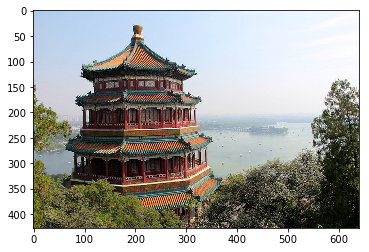

In [2]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

In [3]:
china.shape

(427, 640, 3)

In [4]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


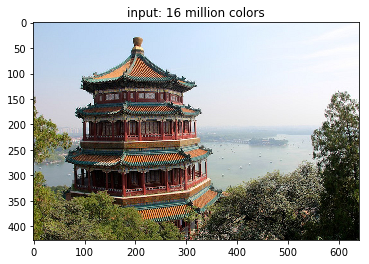

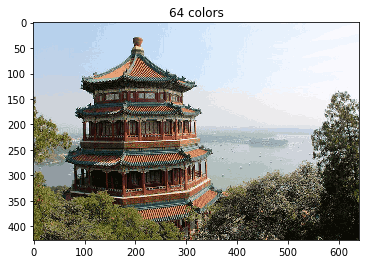

In [5]:
from sklearn.cluster import MiniBatchKMeans
# compress into n_colors
n_colors = 64

# rescale into [0,] and flatten
X = (china / 255.0).reshape(-1, 3)

# create your model here
model = MiniBatchKMeans(n_colors) # '''please use MiniBatchKMeans here'''

# fit
model.fit(X)

# '''get cluster labels of X here'''
labels = model.predict(X)

#　'''get cluster_centers_ here'''
colors = model.cluster_centers_
new_image = colors[labels].reshape(china.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
plt.figure()
plt.imshow(china)
plt.title('input: 16 million colors')

plt.figure()
plt.imshow(new_image)
plt.title('{0} colors'.format(n_colors))